In [17]:
raw_data <- read.csv("SSL_RAT_50_60.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 29055

In [18]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_Rank','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [19]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 29055

In [20]:
head(complete_data)

SSL_SCORE,SSL_SCORE_Rank,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD
346,33486,50-60,0,5,0,0,0,-0.8,0,1
342,41218,50-60,0,4,1,0,0,-0.5,1,0
333,64759,50-60,0,1,4,1,0,0.9,4,0
323,94157,50-60,0,0,0,0,1,-0.1,0,0
310,136256,50-60,0,0,1,0,1,0.5,0,1
304,157766,50-60,0,1,0,0,1,-0.2,0,0


In [21]:
library(MatchIt)
library(dplyr)
library(ggplot2)

In [22]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,20482,182.2626,0.1228971
1,8573,179.4239,0.1613783


In [23]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [24]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + 
    PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + 
    PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + 
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS, 
    data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All         20482    8573
Matched      8573    8573
Unmatched   11909       0
Discarded       0       0


In [25]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

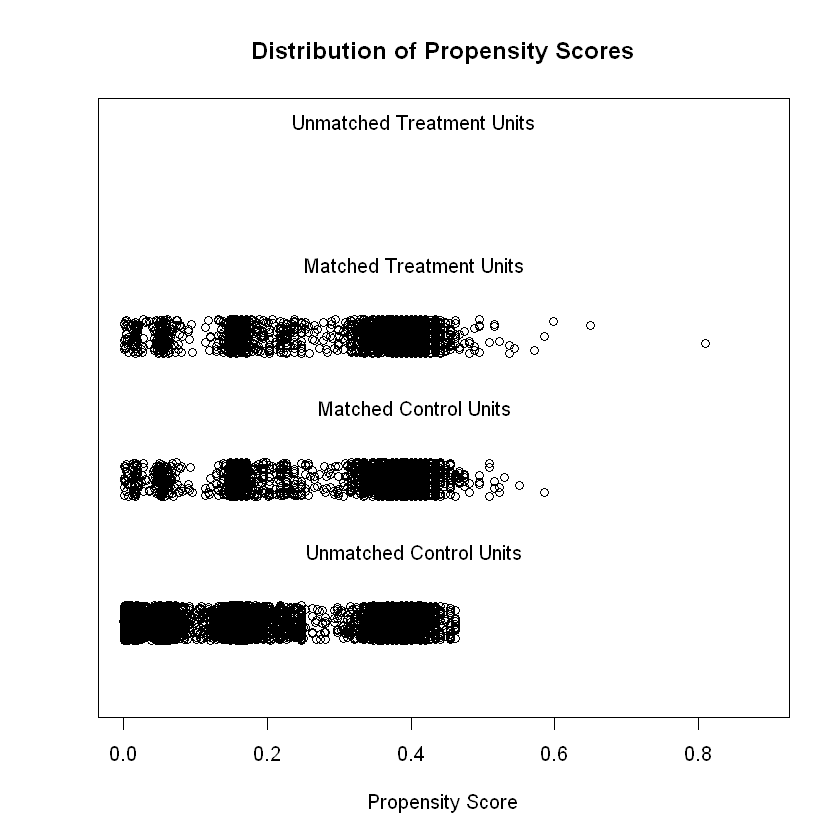

In [26]:
plot(mod_match, type = "jitter")

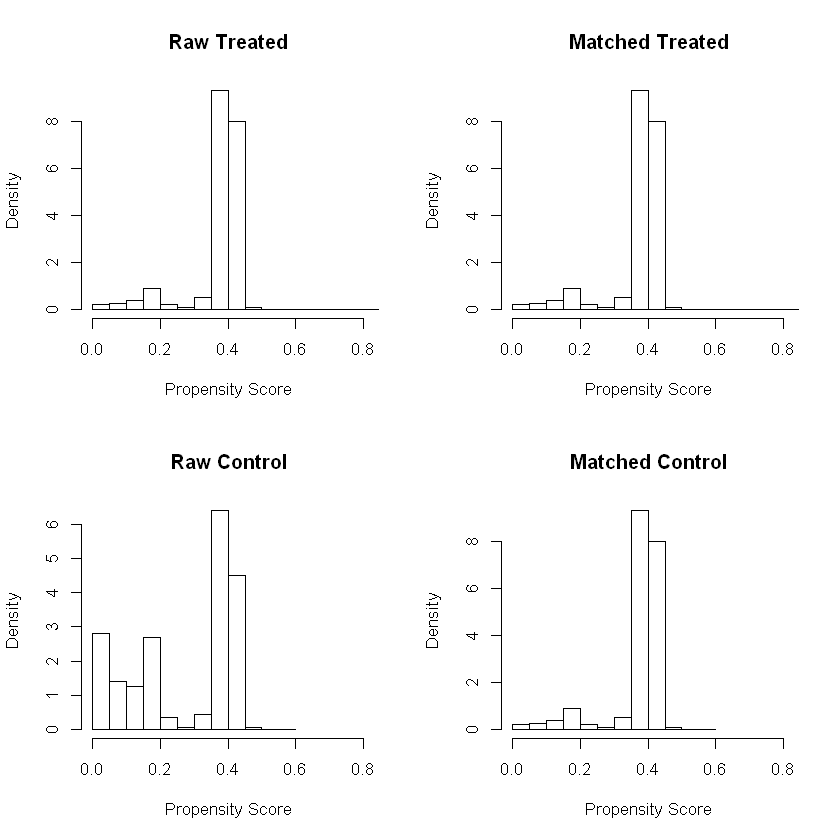

In [27]:
plot(mod_match, type = "hist")

In [28]:
head(matched)

,SSL_SCORE,SSL_SCORE_Rank,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD,distance,weights
1,346,33486,50-60,0,5,0,0,0,-0.8,0,1,0.003183122,1
5,310,136256,50-60,0,0,1,0,1,0.5,0,1,0.154782419,1
23,276,232534,50-60,0,0,0,0,0,0.6,0,1,0.433833726,1
30,272,240559,50-60,1,1,1,0,0,0.3,1,0,0.016723600,1
36,269,248681,50-60,0,2,0,0,0,0.7,0,0,0.093201135,1
40,268,249689,50-60,0,2,0,0,0,0.2,0,0,0.082111957,1


The following objects are masked from matched (pos = 3):

    distance, PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, RACE_CODE_CD, SSL_SCORE,
    SSL_SCORE_Rank, weights



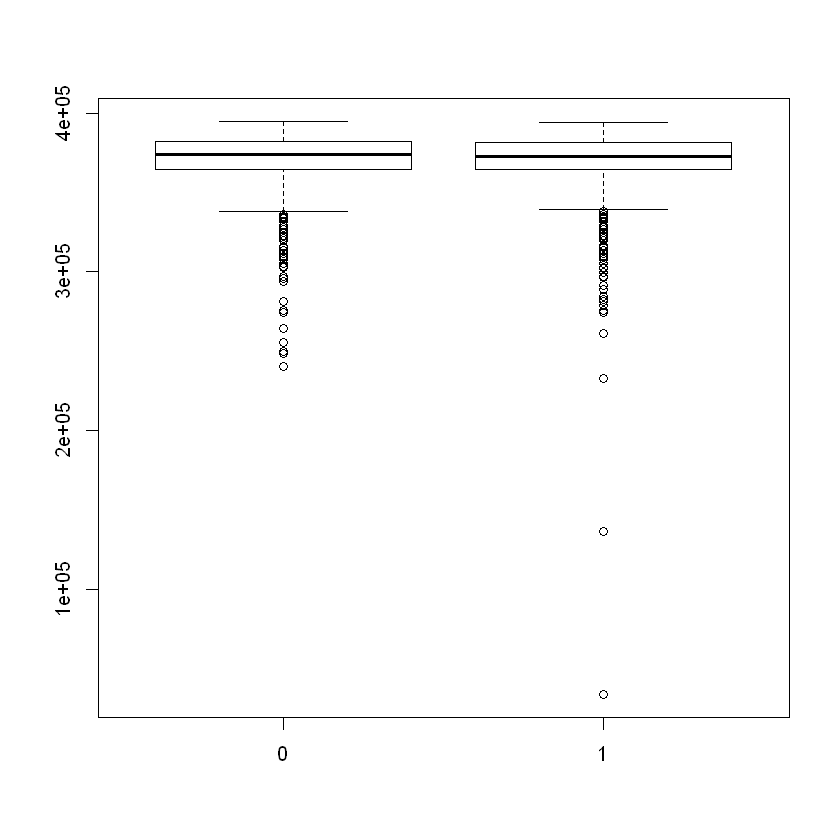

In [29]:
# Doing T - test on matched records
options(warn=-1)

attach(matched)
boxplot(SSL_SCORE_Rank~RACE_CODE_CD)

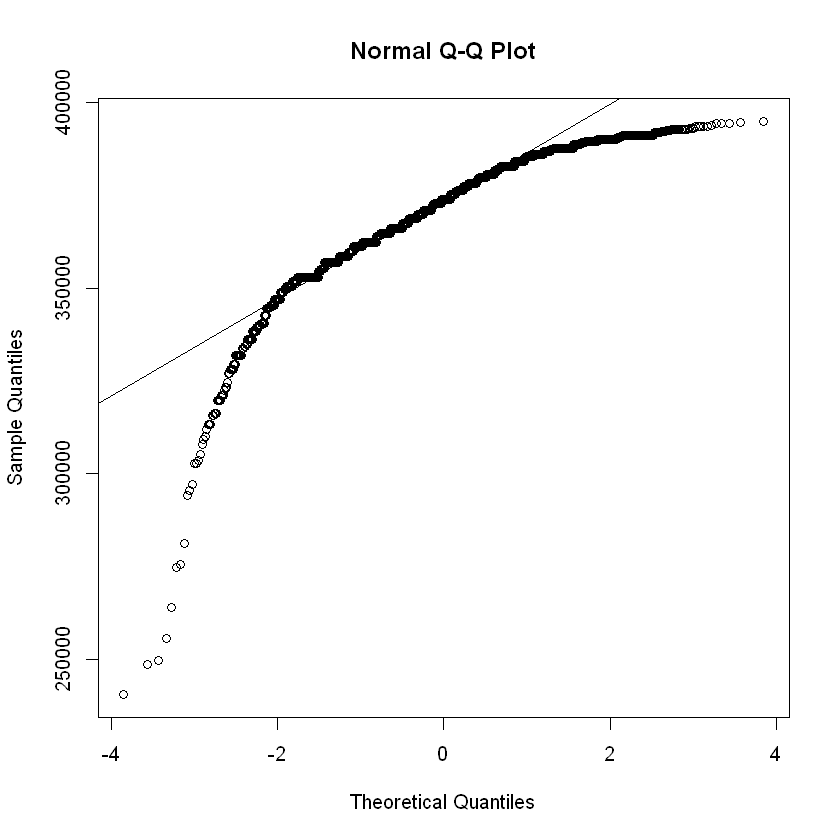

In [30]:
race_black <-subset(matched,RACE_CODE_CD == 0)
race_white<-subset(matched,RACE_CODE_CD == 1)
# Normal QQ Plot for RACE == BLACK
qqnorm(race_black$SSL_SCORE_Rank)
qqline(race_black$SSL_SCORE_Rank)

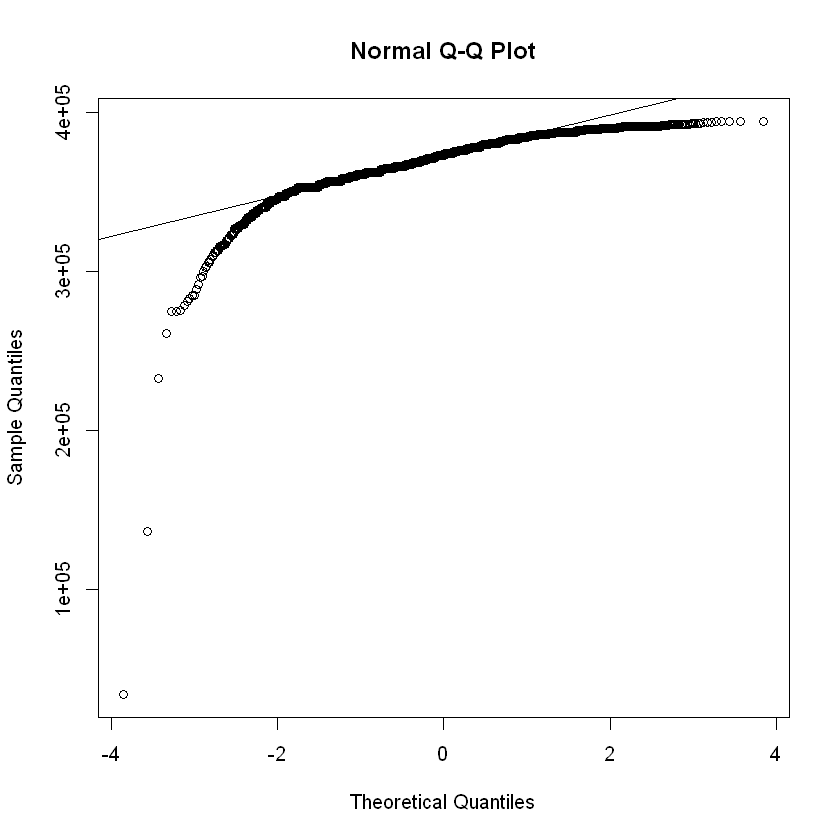

In [31]:
# Normal QQ Plot for RACE == WHITE
qqnorm(race_white$SSL_SCORE_Rank)
qqline(race_white$SSL_SCORE_Rank)

In [32]:
t.test(SSL_SCORE_Rank~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_Rank by RACE_CODE_CD
t = 2.6855, df = 17064, p-value = 0.00725
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 141.7510 907.8429
sample estimates:
mean in group 0 mean in group 1 
       372574.8        372050.0 
